In [17]:
import numpy as np
import sklearn.naive_bayes as nb
import matplotlib.pyplot as mp
import sklearn.svm as svm
import sklearn.model_selection as ms
import sklearn.metrics as sm

data=np.loadtxt('../ml_data/multiple2.txt',delimiter=',')
x=data[:,:2].astype('f8')
y=data[:,-1].astype('f8')
print(x.shape,y.shape)

#拆分测试集与训练集
train_x,test_x,train_y,test_y=\
    ms.train_test_split(
        x,y,test_size=0.25,random_state=7)

(300, 2) (300,)


In [18]:
# 构建高斯朴素贝叶斯模型      svm.SVC支持向量机用于回归分析
model=svm.SVC(probability=True)
#网格搜索确定最优超参数   params参数
params=\
[{'kernel':['linear'],'C':[1,10,100,1000]}, 
{'kernel':['poly'],'C':[1],'degree':[2,3]},
{'kernel':['rbf'],'C':[1,10,100,1000],'gamma':[1,0.1,0.01,0.001]}]
model=ms.GridSearchCV(model,params,cv=5)

In [19]:
model.fit(train_x,train_y)
pred_test_y=model.predict(test_x)
print(sm.classification_report(test_y,pred_test_y))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        40
         1.0       0.97      0.94      0.96        35

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



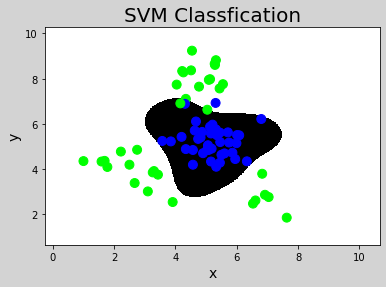

In [20]:
#绘制分类边界线
l,r=x[:,0].min()-1,x[:,0].max()+1
b,t=x[:,1].min()-1,x[:,1].max()+1
n=500
grid_x,grid_y=np.meshgrid(np.linspace(l,r,n),np.linspace(b,t,n))
mesh_x=np.column_stack((grid_x.ravel(),grid_y.ravel()))
mesh_z=model.predict(mesh_x)
grid_z=mesh_z.reshape(grid_x.shape)

mp.figure('SVM Classfication',facecolor='lightgray')
mp.title('SVM Classfication',fontsize=20)
mp.xlabel('x',fontsize=14)
mp.ylabel('y',fontsize=14)
mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')
mp.scatter(test_x[:,0],test_x[:,1],c=test_y,cmap='brg',s=80)
mp.show()